# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Chaewon Park

## UNI: cp3227

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
## unzip dataset
#import zipfile
#with zipfile.ZipFile("tb_lobby_stats_player.csv.zip", 'r') as zip_ref:
#    zip_ref.extractall("./")

In [3]:
player_df = pd.read_csv('tb_lobby_stats_player.csv')

player_df.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

No I would not drop the columns. Dropping the columns only make sense if a lot of the values in the individual column is missing. However, as plotted below, the number of missing values in the columns are less than 1%. Hence, it would be better to impute or infer the missing values rather than removing the columns.

For training a decision tree, I used the mean values of the columns to fill (impute) in the missing values. This is because sklearn's implementation does not support missing values.

In [5]:
col = player_df.columns.values[3 :]
refined_player_df = player_df[col]

sum_df = refined_player_df.isnull().sum()

print(sum_df)

qtKill              0
qtAssist            0
qtDeath             0
qtHs                0
qtBombeDefuse       0
qtBombePlant        0
qtTk              120
qtTkAssist        120
qt1Kill             0
qt2Kill             0
qt3Kill             0
qt4Kill             0
qt5Kill             0
qtPlusKill          0
qtFirstKill         0
vlDamage            0
qtHits            120
qtShots             0
qtLastAlive       120
qtClutchWon         0
qtRoundsPlayed      0
descMapName         0
vlLevel             0
qtSurvived        705
qtTrade           705
qtFlashAssist     705
qtHitHeadshot     705
qtHitChest        705
qtHitStomach      705
qtHitLeftAtm      705
qtHitRightArm     705
qtHitLeftLeg      705
qtHitRightLeg     705
flWinner            0
dtCreatedAt         0
dtype: int64


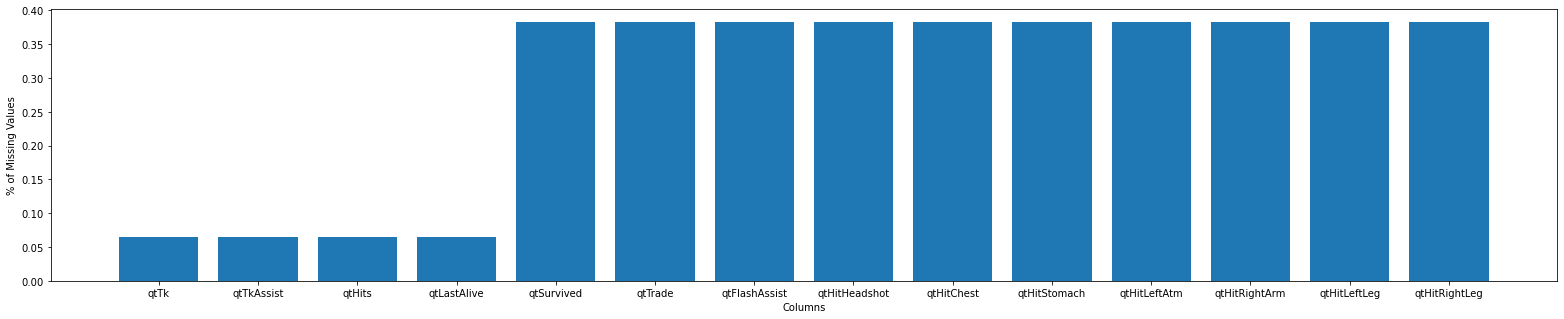

In [7]:
data = (sum_df != 0)
null_cols = data.index[data]

plt.bar(null_cols, refined_player_df.isnull().sum()[null_cols] * 100 / refined_player_df.isnull().count()[null_cols])
plt.xlabel("Columns")
plt.ylabel("% of Missing Values")
plt.rcParams["figure.figsize"] = (27, 5)

plt.show()

In [8]:
player_df = player_df.drop(['dtCreatedAt'], axis = 1)

In [9]:
mean_value=player_df[null_cols].mean()
print(mean_value)

player_df_new = player_df.copy(deep=True)

# Replace NaNs with mean of values of the same column
player_df_new = player_df_new.fillna(value=mean_value)

qtTk              0.022463
qtTkAssist        0.249299
qtHits           64.277283
qtLastAlive       0.713985
qtSurvived        6.954079
qtTrade           3.095254
qtFlashAssist     0.570012
qtHitHeadshot     9.642889
qtHitChest       29.305194
qtHitStomach     13.525509
qtHitLeftAtm      1.902511
qtHitRightArm     5.106091
qtHitLeftLeg      2.265641
qtHitRightLeg     2.496509
dtype: float64


In [10]:
player_df = player_df_new
player_df.isnull().sum()

idLobbyGame       0
idPlayer          0
idRoom            0
qtKill            0
qtAssist          0
qtDeath           0
qtHs              0
qtBombeDefuse     0
qtBombePlant      0
qtTk              0
qtTkAssist        0
qt1Kill           0
qt2Kill           0
qt3Kill           0
qt4Kill           0
qt5Kill           0
qtPlusKill        0
qtFirstKill       0
vlDamage          0
qtHits            0
qtShots           0
qtLastAlive       0
qtClutchWon       0
qtRoundsPlayed    0
descMapName       0
vlLevel           0
qtSurvived        0
qtTrade           0
qtFlashAssist     0
qtHitHeadshot     0
qtHitChest        0
qtHitStomach      0
qtHitLeftAtm      0
qtHitRightArm     0
qtHitLeftLeg      0
qtHitRightLeg     0
flWinner          0
dtype: int64

**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

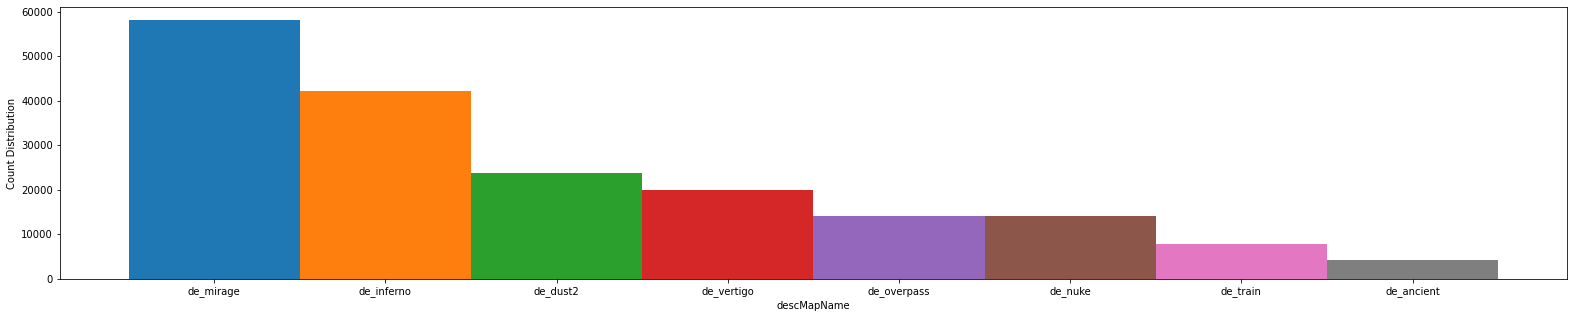

In [11]:
key = player_df['descMapName'].value_counts().keys()
width =1 
for i in range(len(key)):
    k = key[i]
    plt.bar(i , player_df['descMapName'].value_counts()[k], width, label = str(k))

plt.xticks(np.arange(len(key)), key)
plt.xlabel("descMapName")
plt.ylabel("Count Distribution")
plt.show()
plt.rcParams["figure.figsize"] = (20, 5)

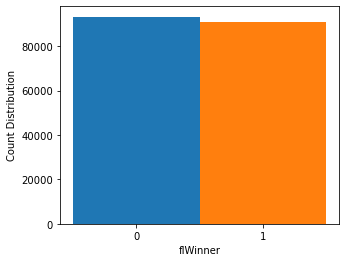

In [13]:
key = player_df['flWinner'].value_counts().keys()

for i in range(len(key)):
    k = key[i]
    plt.bar(i , player_df['flWinner'].value_counts()[k], width, label = str(k))

plt.xticks(np.arange(len(key)), key)
plt.xlabel("flWinner")
plt.ylabel("Count Distribution")
plt.show()
plt.rcParams["figure.figsize"] = (5, 4)

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

I chose to randomly split into dev and test set because we have a decent amount of balanced data, so k-folds is unnecessary.

In [14]:
player_df_X = player_df.drop(columns=['flWinner'])
player_df_y = player_df['flWinner']

In [15]:
x_dev, x_test, y_dev, y_test = train_test_split(player_df_X, player_df_y, test_size=0.2, random_state= 418)

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

I used target encoding to preprocess the categorial variables because using one-hot encoding and then scaling could cause problems. I also applied scaling on the numerical data so that they are normalized with a mean of 0 and var of 1. Currently their range are from 0 (or 1) to various values and is not centered at 0.

In [16]:
### Your code here (Numerical data range checking)
num_features= player_df_X.drop(columns=['idLobbyGame', 'idPlayer', 'idRoom', 'descMapName']).columns.values
te_features = ['idLobbyGame', 'idPlayer', 'idRoom', 'descMapName']

player_df_X[num_features].mean()

qtKill              19.113531
qtAssist             3.756033
qtDeath             18.792459
qtHs                 7.640123
qtBombeDefuse        0.316054
qtBombePlant         1.321349
qtTk                 0.022463
qtTkAssist           0.249299
qt1Kill              8.009943
qt2Kill              3.430107
qt3Kill              1.066874
qt4Kill              0.221105
qt5Kill              0.024958
qtPlusKill           0.000000
qtFirstKill          2.698005
vlDamage          2500.991268
qtHits              64.277283
qtShots            454.456085
qtLastAlive          0.713985
qtClutchWon          0.469308
qtRoundsPlayed      26.461054
vlLevel             13.668350
qtSurvived           6.954079
qtTrade              3.095254
qtFlashAssist        0.570012
qtHitHeadshot        9.642889
qtHitChest          29.305194
qtHitStomach        13.525509
qtHitLeftAtm         1.902511
qtHitRightArm        5.106091
qtHitLeftLeg         2.265641
qtHitRightLeg        2.496509
dtype: float64

In [17]:
player_df_X[num_features].min()

qtKill            0.0
qtAssist          0.0
qtDeath           0.0
qtHs              0.0
qtBombeDefuse     0.0
qtBombePlant      0.0
qtTk              0.0
qtTkAssist        0.0
qt1Kill           0.0
qt2Kill           0.0
qt3Kill           0.0
qt4Kill           0.0
qt5Kill           0.0
qtPlusKill        0.0
qtFirstKill       0.0
vlDamage          0.0
qtHits            0.0
qtShots           0.0
qtLastAlive       0.0
qtClutchWon       0.0
qtRoundsPlayed    1.0
vlLevel           0.0
qtSurvived        0.0
qtTrade           0.0
qtFlashAssist     0.0
qtHitHeadshot     0.0
qtHitChest        0.0
qtHitStomach      0.0
qtHitLeftAtm      0.0
qtHitRightArm     0.0
qtHitLeftLeg      0.0
qtHitRightLeg     0.0
dtype: float64

In [18]:
player_df_X[num_features].max()

qtKill               85.0
qtAssist             24.0
qtDeath              65.0
qtHs                 41.0
qtBombeDefuse         5.0
qtBombePlant         12.0
qtTk                 12.0
qtTkAssist            9.0
qt1Kill              31.0
qt2Kill              16.0
qt3Kill              11.0
qt4Kill               6.0
qt5Kill               3.0
qtPlusKill            0.0
qtFirstKill          20.0
vlDamage          10794.0
qtHits              277.0
qtShots            2131.0
qtLastAlive          29.0
qtClutchWon           8.0
qtRoundsPlayed       84.0
vlLevel              21.0
qtSurvived           37.0
qtTrade              20.0
qtFlashAssist        14.0
qtHitHeadshot        49.0
qtHitChest          122.0
qtHitStomach         77.0
qtHitLeftAtm         17.0
qtHitRightArm        30.0
qtHitLeftLeg         21.0
qtHitRightLeg        22.0
dtype: float64

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import TargetEncoder
from sklearn import pipeline

In [20]:
# use target encoder
te = TargetEncoder(cols=te_features).fit(x_dev, y_dev)
x_dev = te.transform(x_dev)
x_test = te.transform(x_test)

# use standard scaler()
ss = StandardScaler()
x_dev = ss.fit_transform(x_dev)
x_test = ss.transform(x_test)

In [25]:
print(x_dev.shape, x_test.shape)

(147321, 36) (36831, 36)


Note: Both x_dev and x_test have the same number of categories as well as same categories due to our splitting method, so we don't need to apply encoding twice. 

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

The basic score works well in this case, because the dataset is balanced so we don't have to worry about the model making biased decisions that may incur the need to use F1 score.

In [21]:
DT = DecisionTreeClassifier()
pipe = pipeline.make_pipeline(DT)
pipe.fit(x_dev, y_dev)

print(pipe.score(x_dev, y_dev))
print(pipe.score(x_test, y_test))

1.0
0.7271863375960468


**1.7: Visualize the trained tree until the max_depth 8**

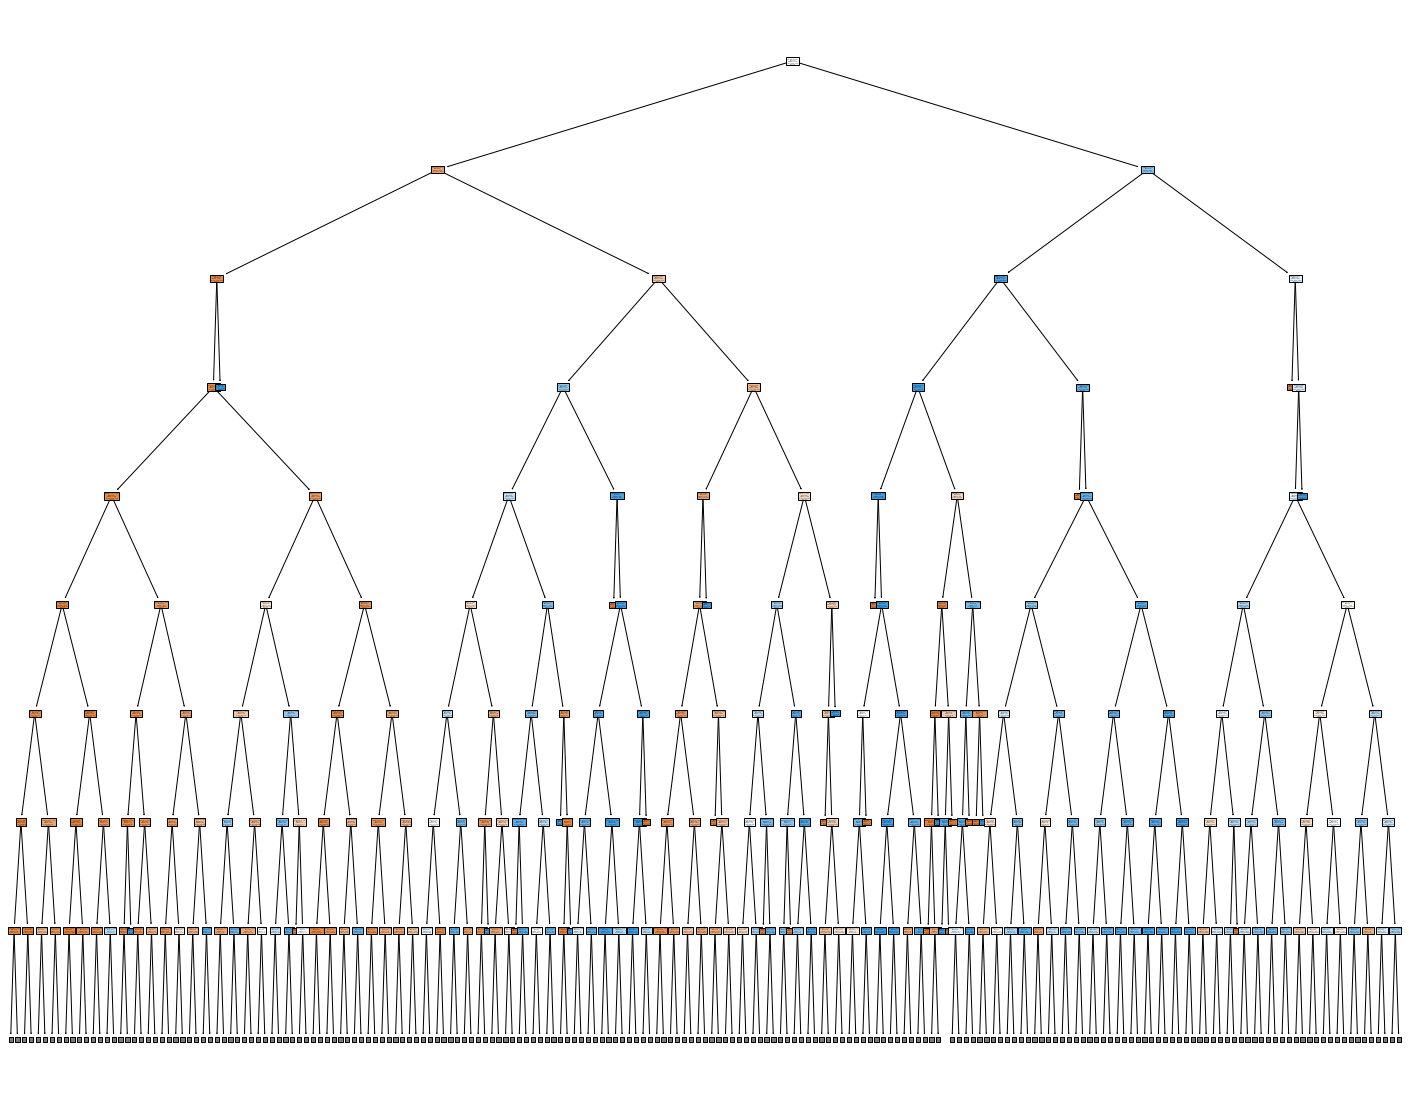

In [22]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT, max_depth=8, feature_names= player_df_X.columns, class_names= ['0', '1'], filled=True)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

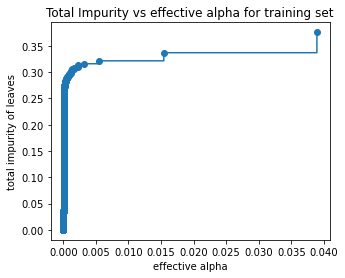

In [26]:
# As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves
# the maximum effective alpha value is removed, because it is the trivial tree with only one node
path = DT.cost_complexity_pruning_path(x_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [27]:
print(ccp_alphas)
print(ccp_alphas[-11:-1])

[0.00000000e+00 1.35266878e-05 1.72387563e-05 ... 1.54309776e-02
 3.89282906e-02 1.23968577e-01]
[0.00130935 0.00141262 0.00160495 0.00167974 0.00221121 0.0022299
 0.00314111 0.00554435 0.01543098 0.03892829]


Since, there are approximately 9.5k alpha values for the pruning path, you can just use last 10 values of alpha excluding the last value.

In [28]:
pipe = pipeline.make_pipeline(GridSearchCV(DT, param_grid = [{"ccp_alpha": ccp_alphas[-11:-1]}], return_train_score = True))
pipe.fit(x_dev, y_dev)

grid_results = pipe.named_steps["gridsearchcv"]
print("Best Score:", grid_results.best_score_)
print("Best Alpha:", grid_results.best_params_)
print("Best Score:", pipe.score(x_test, y_test))

Best Score: 0.7660686143824993
Best Alpha: {'ccp_alpha': 0.0013093455812577676}
Best Score: 0.7609622329016318


As seen above, pruning the tree increased the test score from 0.7271863375960468 to 0.7609622329016318.

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

The top 3 most important features are: qtSurvived, qtDeath, idRoom.

The importance of these features can be justified by the fact that they are located on the top of the decision tree. This means that they have the highest information gain and therefore the most important features with highest discriminative power. Also, if we take the indexes of the Decision Tree's top 3 feature importances, it corresponds to the features listed above.

In [29]:
DT.ccp_alpha = 0.0013093455812577676
DT.fit(x_dev, y_dev)

feat_imp = DT.feature_importances_

col_list = player_df_X.columns.values

k=3
index = np.argpartition(feat_imp, len(feat_imp) - k)[-k:]
print("Top 3 Most Important Features:", col_list[index])

Top 3 Most Important Features: ['idRoom' 'qtDeath' 'qtSurvived']


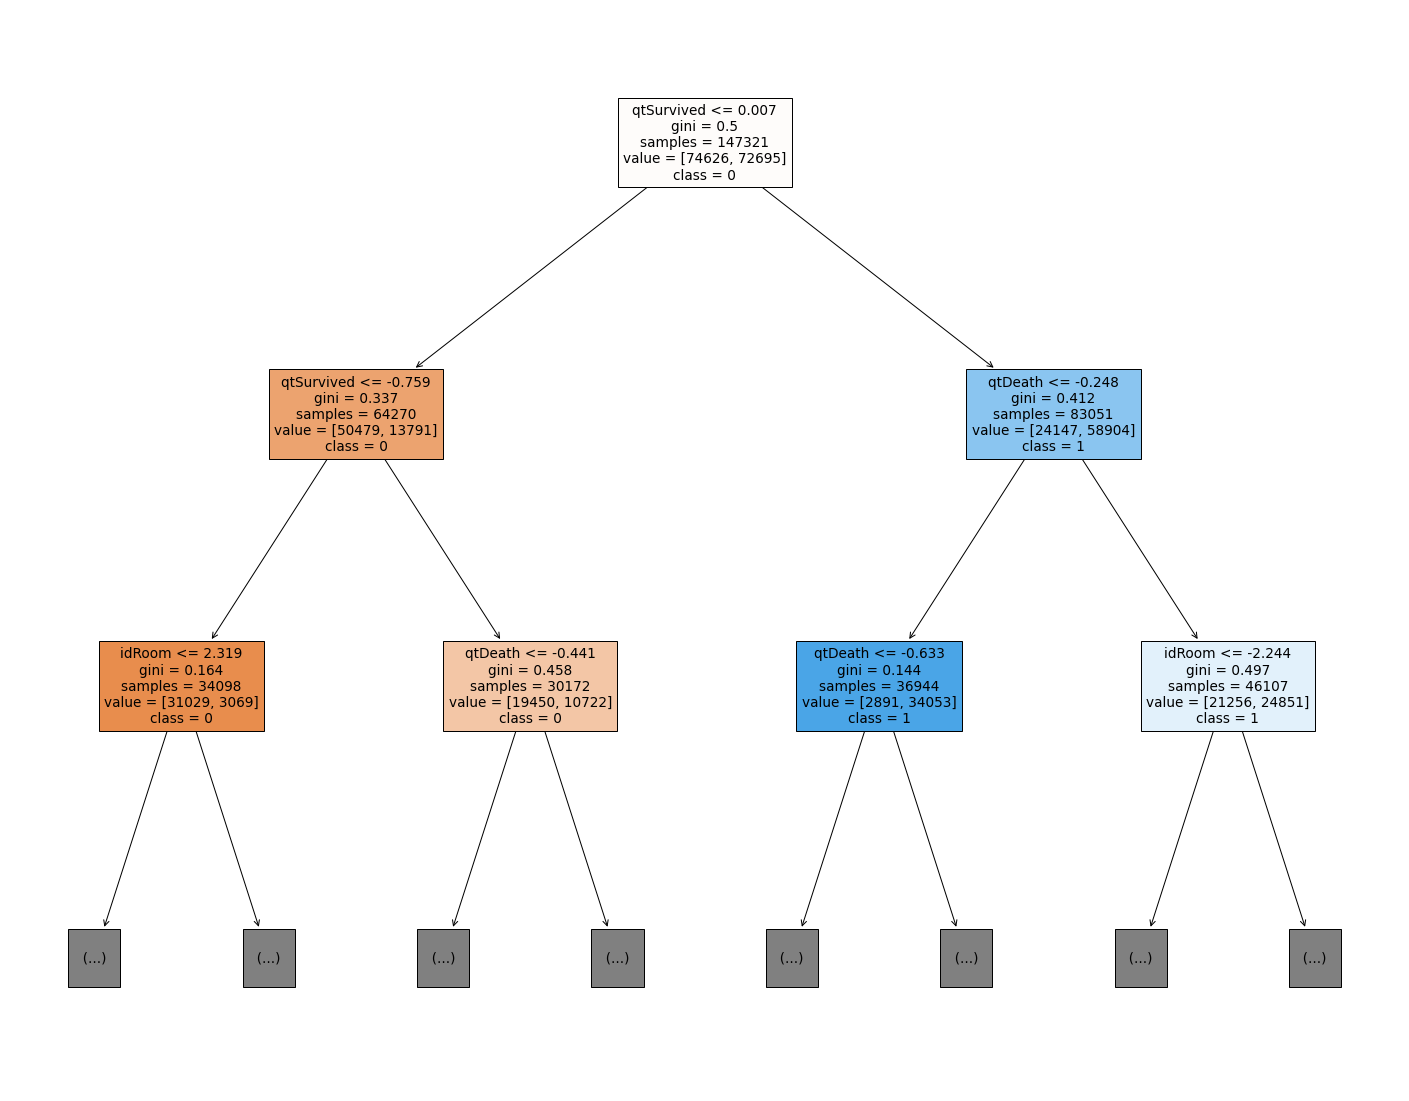

In [30]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(DT, max_depth=2, feature_names= player_df_X.columns, class_names= ['0', '1'], filled=True)

## Question 2: Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
pipe = pipeline.make_pipeline(RFC)
pipe.fit(x_dev, y_dev)

print(pipe.score(x_dev, y_dev))
print(pipe.score(x_test, y_test))

1.0
0.7895251282886698


**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In Q.16, we had dev score of 1.0 and test score of 0.7271863375960468.
For this question, we similarly have dev score of 1.0 but a much higher score of 0.7895251282886698. Hence Random Forest model works better than Decision Tree model on the test dataset.

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

Yes, we can verify this by looking at the gini impurity value of all the leaves in each individual tree (estimator).

In [32]:
ImpureFlag = False
count=0
for tree in RFC.estimators_:
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    leaf_nodes = []
    for i in range(n_nodes):
        if children_left[i] == children_right[i]:
            if tree.tree_.impurity[i]!=0:
                ImpureFlag = True
                print("Impure Leaf Node Exists")
                break
    count= count+1
if not ImpureFlag:
    print("All", count , " Trees have Pure Leaves")

All 100  Trees have Pure Leaves


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


I would choose the number of trees (n_estimators) and the number of features (max_features). This is because they are the most intuitive and most significant hyper-parameters that we can gauge the effects of.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

I would randomly choose the values so that we can do random search. Random search has empirically proven to be more effective than grid search.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
import random

model_params = {
    'n_estimators': random.sample(range(1, 180), 3),
    'max_features': random.sample(range(1, RFC.n_features_), 3)
}

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

As seen below, the model score improved from 0.7895251282886698 to 0.793244820938883.

In [34]:
pipe = pipeline.make_pipeline(RandomizedSearchCV(RFC, model_params, return_train_score = True, cv = 5, verbose = 5))
pipe.fit(x_dev, y_dev)

random_results = pipe.named_steps["randomizedsearchcv"]
print("Best Score:", random_results.best_score_)
print("Best Params:", random_results.best_params_)
print("Best Score:", pipe.score(x_test, y_test))

C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_features=19, n_estimators=109;, score=(train=1.000, test=0.803) total time= 1.7min
[CV 2/5] END max_features=19, n_estimators=109;, score=(train=1.000, test=0.803) total time= 1.6min
[CV 3/5] END max_features=19, n_estimators=109;, score=(train=1.000, test=0.803) total time= 1.6min
[CV 4/5] END max_features=19, n_estimators=109;, score=(train=1.000, test=0.802) total time= 1.6min
[CV 5/5] END max_features=19, n_estimators=109;, score=(train=1.000, test=0.805) total time= 1.6min
[CV 1/5] END max_features=19, n_estimators=63;, score=(train=1.000, test=0.802) total time=  55.8s
[CV 2/5] END max_features=19, n_estimators=63;, score=(train=1.000, test=0.801) total time=  56.1s
[CV 3/5] END max_features=19, n_estimators=63;, score=(train=1.000, test=0.804) total time=  55.0s
[CV 4/5] END max_features=19, n_estimators=63;, score=(train=1.000, test=0.801) total time=  55.1s
[CV 5/5] END max_features=19, n_estimators=6

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

The top 3 most important features are: 'vlDamage' 'qtDeath' 'qtSurvived'.
This is slightly different from the previous answer of 'qtSurvived', 'qtDeath', and 'idRoom'.
Using 'vlDamage' seems more plausible than 'idRoom', because 'vlDamage' is a numerical variable that refers to 'total match damage' and 'idRoom' is simply a categorical feature representing the ID of the room.
The target variable, "winner flag" has a stronger relationship with the match damage, compared to the room ID.

In [35]:
RFC.n_estimators = 109
RFC.max_features = 19

RFC.fit(x_dev, y_dev)

feat_imp = RFC.feature_importances_

col_list = player_df_X.columns.values

k=3
index = np.argpartition(feat_imp, len(feat_imp) - k)[-k:]
print("Top 3 Most Important Features:", col_list[index])

Top 3 Most Important Features: ['vlDamage' 'qtDeath' 'qtSurvived']


## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [38]:
import time
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

GBC = GradientBoostingClassifier()

model_params = {
    'n_estimators': random.sample(range(1, 200), 3),
    'max_features': random.sample(range(1, DT.n_features_), 3),
    'learning_rate': [0.001, 0.01, 0.1]
}

pipe = pipeline.make_pipeline(RandomizedSearchCV(GBC, model_params, return_train_score = True, cv = 5, verbose = 5))
pipe.fit(x_dev, y_dev)

random_results = pipe.named_steps["randomizedsearchcv"]

print("-------- GradientBoostingClassifier --------")
print("Best Score:", random_results.best_score_)
print("Best Params:", random_results.best_params_)
print("Best Score:", pipe.score(x_test, y_test))
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


[CV 1/5] END learning_rate=0.1, max_features=8, n_estimators=97;, score=(train=0.806, test=0.807) total time=  16.1s
[CV 2/5] END learning_rate=0.1, max_features=8, n_estimators=97;, score=(train=0.805, test=0.804) total time=  15.7s
[CV 3/5] END learning_rate=0.1, max_features=8, n_estimators=97;, score=(train=0.806, test=0.805) total time=  16.5s
[CV 4/5] END learning_rate=0.1, max_features=8, n_estimators=97;, score=(train=0.807, test=0.799) total time=  15.8s
[CV 5/5] END learning_rate=0.1, max_features=8, n_estimators=97;, score=(train=0.805, test=0.804) total time=  15.7s
[CV 1/5] END learning_rate=0.01, max_features=28, n_estimators=82;, score=(train=0.771, test=0.771) total time=  40.8s
[CV 2/5] END learning_rate=0.01, max_features=28, n_estimators=82;, score=(train=0.772, test=0.771) total time=  38.4s
[CV 3/5] END learning_rate=0.01, max_features=28, n_estimators=82;, score=(train=0.772, test=0.771) total time=  32.6s
[CV 4/5] END learning_rate=0.01, max_features=28, n_estima

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

start_time = time.time()

HGBC = HistGradientBoostingClassifier()

model_params = {
    'max_iter': random.sample(range(1, 200), 3),
    'max_depth': random.sample(range(1, 10), 3),
    'learning_rate': [0.001, 0.01, 0.1]
}

pipe = pipeline.make_pipeline(RandomizedSearchCV(HGBC, model_params, return_train_score = True, cv = 5, verbose = 5))
pipe.fit(x_dev, y_dev)

random_results = pipe.named_steps["randomizedsearchcv"]
print("-------- HistGradientBoostingClassifier --------")
print("Best Score:", random_results.best_score_)
print("Best Params:", random_results.best_params_)
print("Best Score:", pipe.score(x_test, y_test))
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\cwp94\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, max_depth=3, max_iter=141;, score=(train=0.811, test=0.811) total time=   2.7s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_iter=141;, score=(train=0.811, test=0.809) total time=   3.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, max_iter=141;, score=(train=0.811, test=0.810) total time=   2.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_iter=141;, score=(train=0.813, test=0.806) total time=   3.4s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_iter=141;, score=(train=0.812, test=0.811) total time=   2.5s
[CV 1/5] END learning_rate=0.001, max_depth=6, max_iter=141;, score=(train=0.784, test=0.785) total time=   4.3s
[CV 2/5] END learning_rate=0.001, max_depth=6, max_iter=141;, score=(train=0.785, test=0.782) total time=   3.7s
[CV 3/5] END learning_rate=0.001, max_depth=6, max_iter=141;, score=(train=0.780, test=0.783) total time=   3.6s
[CV 4/5] END learning_rate=0.001, max_depth=6, max_iter=141;, score=(train=0.783, test=0.780) total time= 

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

From 3.1, GradientBoostingClassifier best test score is  0.7917243626293068 and HistGradientBoostingClassifier best test score is 0.7987293312698542. Meanwhile XGBoost best test score is 0.8014444353940974. 
XGBoost performed better than both GradientBoostingClassifier and HistGradientBoostingClassifier.

In [40]:
#!pip install xgboost

In [41]:
from xgboost import XGBClassifier

start_time = time.time()

XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model_params = {
    'n_estimators': random.sample(range(1, 200), 3),
    'max_depth': random.sample(range(1, 10), 3),
    'learning_rate': [0.001, 0.01, 0.1]
}

pipe = pipeline.make_pipeline(RandomizedSearchCV(XGB, model_params, return_train_score = True, cv = 5, verbose = 5))
pipe.fit(x_dev, y_dev)

random_results = pipe.named_steps["randomizedsearchcv"]
print("-------- XGBClassifier --------")
print("Best Score:", random_results.best_score_)
print("Best Params:", random_results.best_params_)
print("Best Score:", pipe.score(x_test, y_test))
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=106;, score=(train=0.770, test=0.770) total time=   3.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=106;, score=(train=0.770, test=0.770) total time=   3.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=106;, score=(train=0.770, test=0.770) total time=   3.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=106;, score=(train=0.771, test=0.770) total time=   3.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=106;, score=(train=0.770, test=0.772) total time=   3.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=95;, score=(train=0.812, test=0.813) total time=   3.5s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=95;, score=(train=0.813, test=0.809) total time=   3.9s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=95;, score=(train=0.813, test=0.810) total time=   3.5s
[CV 4/5] END lear

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

XGBoost best test score is 0.8014444353940974.
HistGradientBoostingClassifier best test score is 0.7987293312698542.
GradientBoostingClassifier best test score is 0.7917243626293068.
Random Forest best test score is 0.7895251282886698.
Decision Tree best test score is 0.7271863375960468.

The best model is XGBoost and the worst model is Decision tree. The difference between the two model score is around 0.074.

I would choose XGBoost among these models because its test score is highest and also, the model selection time does not take that long.

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [42]:
XGB.n_estimators = 133
XGB.max_depth = 6
XGB.learning_rate = 0.1

XGB.fit(x_dev, y_dev)

feat_imp = XGB.feature_importances_

col_list = player_df_X.columns.values

k=3
index = np.argpartition(feat_imp, len(feat_imp) - k)[-k:]
print("Top 3 Most Important Features:", col_list[index])

Top 3 Most Important Features: ['idRoom' 'qtDeath' 'qtSurvived']


The top 3 features from Random Forest were : 'vlDamage', 'qtDeath', 'qtSurvived'.
The top 3 features from Decision Tree were : 'idRoom', 'qtDeath', 'qtSurvived'.
Hence, the top 3 features from XGBoost is the same as those of the Decision Tree.

I would trust the top 3 features of XGBoost most, because it has the highest score.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [43]:
feat_imp = XGB.feature_importances_

col_list = player_df_X.columns.values

k=7
index = np.argpartition(feat_imp, len(feat_imp) - k)[-k:]
print("Top 7 Most Important Features:", col_list[index])

Top 7 Most Important Features: ['qtFirstKill' 'qtTrade' 'qtSurvived' 'qtDeath' 'qtAssist' 'idRoom'
 'idLobbyGame']


In [44]:
## Drop all features excluding the 7 features above (for both dev and test dataset)
temp_dev = pd.DataFrame(x_dev, columns = col_list)[col_list[index]]
print(temp_dev)


temp_test = pd.DataFrame(x_test, columns = col_list)[col_list[index]]
print(temp_test)

        qtFirstKill   qtTrade  qtSurvived   qtDeath  qtAssist    idRoom  \
0          0.670554  1.010213    1.560986 -0.152371 -1.703721 -0.007128   
1          0.670554 -0.052372    0.323664  1.384333 -0.796422 -0.007128   
2          1.697993  0.478920    3.107639  1.000157 -0.796422 -0.007128   
3          0.156835  1.541505   -1.222988  1.576421 -0.342772 -0.007128   
4          0.156835  1.541505    0.014334 -0.152371 -0.342772 -4.481701   
...             ...       ...         ...       ...       ...       ...   
147316     2.725432  0.478920   -0.294997 -0.728635 -1.250072 -0.007128   
147317    -0.356885  1.010213    0.323664 -0.728635  0.564527 -0.007128   
147318     0.156835 -0.052372   -1.222988  0.039717  0.110877 -0.007128   
147319    -0.356885 -0.052372   -1.532319  1.384333  0.110877 -0.007128   
147320    -0.356885 -0.052372   -1.222988  0.615981  0.110877 -0.007128   

        idLobbyGame  
0         -0.005503  
1         -0.005503  
2         -0.005503  
3         -

In [45]:
start_time = time.time()

XGB_new = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model_params = {
    'n_estimators': random.sample(range(1, 200), 3),
    'max_depth': random.sample(range(1, 10), 3),
    'learning_rate': [0.001, 0.01, 0.1]
}

pipe = pipeline.make_pipeline(RandomizedSearchCV(XGB_new, model_params, return_train_score = True, cv = 5, verbose = 5))
pipe.fit(temp_dev, y_dev)

random_results = pipe.named_steps["randomizedsearchcv"]
print("-------- XGBClassifier (For Top 7 Features) --------")
print("Best Score:", random_results.best_score_)
print("Best Params:", random_results.best_params_)
print("Best Score:", pipe.score(temp_test, y_test))
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=46;, score=(train=0.788, test=0.788) total time=   0.6s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=46;, score=(train=0.789, test=0.790) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=46;, score=(train=0.788, test=0.789) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=46;, score=(train=0.789, test=0.785) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=46;, score=(train=0.788, test=0.789) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.001, max_depth=7, n_estimators=46;, score=(train=0.786, test=0.789) total time=   1.7s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.001, max_depth=7, n_estimators=46;, score=(train=0.787, test=0.786) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.001, max_depth=7, n_estimators=46;, score=(train=0.786, test=0.790) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.001, max_depth=7, n_estimators=46;, score=(train=0.788, test=0.781) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.001, max_depth=7, n_estimators=46;, score=(train=0.787, test=0.786) total time=   1.7s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=61;, score=(train=0.802, test=0.802) total time=   1.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=61;, score=(train=0.802, test=0.800) total time=   1.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=61;, score=(train=0.802, test=0.802) total time=   1.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=61;, score=(train=0.803, test=0.797) total time=   1.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=61;, score=(train=0.801, test=0.802) total time=   1.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=46;, score=(train=0.764, test=0.765) total time=   0.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=46;, score=(train=0.764, test=0.763) total time=   1.0s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=46;, score=(train=0.773, test=0.775) total time=   1.0s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=46;, score=(train=0.773, test=0.769) total time=   1.0s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=46;, score=(train=0.776, test=0.775) total time=   1.0s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=46;, score=(train=0.742, test=0.743) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=46;, score=(train=0.742, test=0.743) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=46;, score=(train=0.742, test=0.744) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=46;, score=(train=0.744, test=0.738) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=46;, score=(train=0.742, test=0.744) total time=   0.5s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=46;, score=(train=0.798, test=0.798) total time=   0.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=46;, score=(train=0.799, test=0.797) total time=   0.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=46;, score=(train=0.799, test=0.800) total time=   0.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=46;, score=(train=0.800, test=0.793) total time=   1.0s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=46;, score=(train=0.798, test=0.799) total time=   0.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.001, max_depth=4, n_estimators=108;, score=(train=0.762, test=0.762) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.001, max_depth=4, n_estimators=108;, score=(train=0.761, test=0.760) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.001, max_depth=4, n_estimators=108;, score=(train=0.762, test=0.764) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.001, max_depth=4, n_estimators=108;, score=(train=0.762, test=0.758) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.001, max_depth=4, n_estimators=108;, score=(train=0.761, test=0.762) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=108;, score=(train=0.782, test=0.782) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=108;, score=(train=0.782, test=0.781) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=108;, score=(train=0.778, test=0.778) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=108;, score=(train=0.782, test=0.778) total time=   2.3s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=108;, score=(train=0.782, test=0.781) total time=   2.6s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=46;, score=(train=0.794, test=0.793) total time=   2.1s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=46;, score=(train=0.795, test=0.793) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=46;, score=(train=0.794, test=0.795) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimators=46;, score=(train=0.794, test=0.788) total time=   1.9s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.01, max_depth=7, n_estimators=46;, score=(train=0.794, test=0.793) total time=   1.8s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=108;, score=(train=0.805, test=0.805) total time=   2.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=108;, score=(train=0.805, test=0.803) total time=   2.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=108;, score=(train=0.806, test=0.803) total time=   2.2s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=108;, score=(train=0.807, test=0.801) total time=   2.1s


C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\cwp94\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=108;, score=(train=0.805, test=0.806) total time=   2.2s
-------- XGBClassifier (For Top 7 Features) --------
Best Score: 0.8036668126618054
Best Params: {'n_estimators': 108, 'max_depth': 4, 'learning_rate': 0.1}
Best Score: 0.793624935516277
Elapsed time to compute the importances: 84.075 seconds


**Question: Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

**Answer:** From 3.1, GradientBoostingClassifier best test score is 0.7917243626293068 and HistGradientBoostingClassifier best test score is 0.7987293312698542. Meanwhile XGBoost best test score is 0.8014444353940974. XGBoost performed better than both GradientBoostingClassifier and HistGradientBoostingClassifier.

After dropping all features except the 7 most important ones, XGBoost has test score of 0.793624935516277, which is now inferior compared to the original models. This shows that having more features (even though they might not be the top n important ones) is cruical to having a robust and good model performance, because those features give richer dimensional information about the data.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [46]:
#conda update scikit-learn

Brier Score: 0.3760005244203229


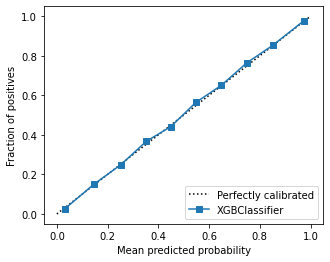

In [54]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import brier_score_loss

model_score_test = XGB.predict_proba(x_test)
y_true_test_flatten = y_test.values.reshape(-1, 1)
y_pred_prob= np.take_along_axis(model_score_test, y_true_test_flatten, axis=1)
brier = brier_score_loss(y_true_test_flatten, y_pred_prob)
print("Brier Score:", brier)

disp = CalibrationDisplay.from_estimator(XGB, x_test, y_test, n_bins = 10)

In [49]:
# split dev to train & val
x_train, x_calib, y_train, y_calib = train_test_split(x_dev, y_dev, test_size = 0.2, random_state=0)

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

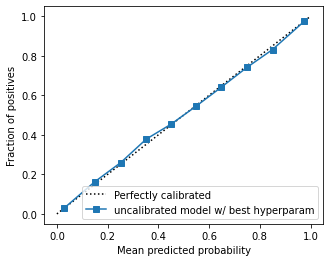

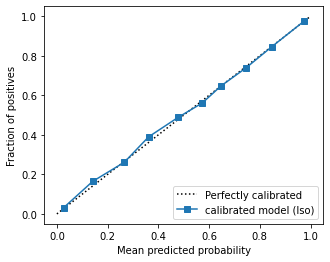

In [57]:
## Iso Scaling
XGB_iso_calib = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# set optimal hyper-param    
XGB_iso_calib.n_estimators = 161
XGB_iso_calib.max_depth = 8
XGB_iso_calib.learning_rate = 0.1

XGB_iso_calib.fit(x_train, y_train)
disp = CalibrationDisplay.from_estimator(XGB_iso_calib, x_test, y_test, n_bins = 10, name="uncalibrated model w/ best hyperparam")

calibrated_model_iso = CalibratedClassifierCV(XGB_iso_calib, cv="prefit", method="isotonic")
calibrated_model_iso.fit(x_calib, y_calib)
display = CalibrationDisplay.from_estimator(calibrated_model_iso, x_test, y_test, n_bins = 10, name="calibrated model (Iso)")

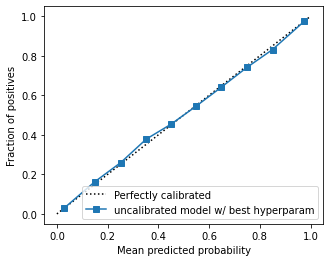

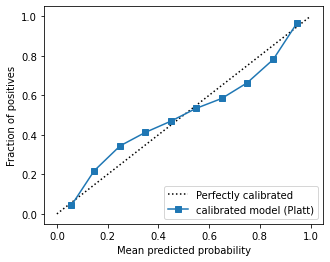

In [56]:
## Platt Scaling
XGB_platt_calib = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# set optimal hyper-param    
XGB_platt_calib.n_estimators = 161
XGB_platt_calib.max_depth = 8
XGB_platt_calib.learning_rate = 0.1

XGB_platt_calib.fit(x_train, y_train)
disp = CalibrationDisplay.from_estimator(XGB_platt_calib, x_test, y_test, n_bins = 10, name="uncalibrated model w/ best hyperparam")

calibrated_model_platt = CalibratedClassifierCV(XGB_platt_calib, cv="prefit", method="sigmoid")
calibrated_model_platt.fit(x_calib, y_calib)
display = CalibrationDisplay.from_estimator(calibrated_model_platt, x_test, y_test, n_bins = 10, name="calibrated model (Platt)")

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [58]:
model_score_test = calibrated_model_iso.predict_proba(x_test)
y_true_test_flatten = y_test.values.reshape(-1, 1)
y_pred_prob= np.take_along_axis(model_score_test, y_true_test_flatten, axis=1)
brier = brier_score_loss(y_true_test_flatten, y_pred_prob)
print("Brier Score:", brier)

Brier Score: 0.3824221345736876


In [59]:
model_score_test = calibrated_model_platt.predict_proba(x_test)
y_true_test_flatten = y_test.values.reshape(-1, 1)
y_pred_prob= np.take_along_axis(model_score_test, y_true_test_flatten, axis=1)
brier = brier_score_loss(y_true_test_flatten, y_pred_prob)
print("Brier Score:", brier)

Brier Score: 0.38662199941628766


The calibration theoretically should help decrease Brier Score and help in having better predicted probabilities, but in our example, because the dataset is already well calibrated, applying the two calibration method doesn't show much positive effect.